In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thesis')
from utils import *

In [2]:
root = "sfh_1000_20260129_105638"

def load_data(n):
    data = np.load(f"/avatar/vmehta/{root}/{n}_pred_labels.npy")
    return data

sets = [10, 25, 50, 100, 250, 500]

pred_labels_all = [10**(load_data(n)) for n in sets]
real_labels_all = 10**(np.load(f"/avatar/vmehta/{root}/true_labels.npy"))

bin_arr = np.r_[np.array([0.1, 20, 50, 100, 200, 500])*1e6, np.logspace(9.5, 10.15, 5)]
binning = np.log10(bin_arr)
bin_widths = np.diff(binning)
bin_centers = binning[:-1] + bin_widths/2

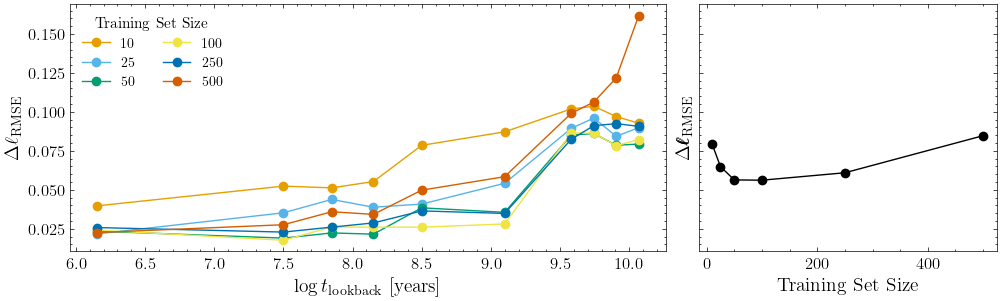

In [ ]:
# comparing different size training set

fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True, constrained_layout=True, gridspec_kw={'width_ratios': [2, 1]})

overall = []
for m in range(len(pred_labels_all)):
    rmses, overall_val = rmse(real_labels_all, pred_labels_all[m])
    overall.append(overall_val)

    ax[0].plot(bin_centers, rmses, marker='o')

ax[1].plot(sets, overall, 'k', marker='o')
ax[0].legend([str(s) for s in sets], title='Training Set Size', loc='upper left', ncol=2, fontsize=10)
ax[0].set_ylabel("$\\Delta\\ell_\\mathrm{RMSE}$")
ax[0].set_xlabel("$\\log t_\\mathrm{lookback}$ [years]")
ax[1].set_ylabel("$\\Delta\\pmb\\ell_\\mathrm{RMSE}$")
ax[1].set_xlabel("Training Set Size")
#plt.savefig('/home/vmehta/honours-project/thesis/figures/training_set.pdf', format='pdf')
plt.show()